In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime

In [2]:
dataSet = pd.read_csv("Data.csv")

In [3]:
dataSet

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
0,1,01-02-2023 00:00,01-02-2023 00:15,95.0,35.0,NaN,90.1,56.2,0.31,NaN,17.7,28.1,0.4
1,2,01-02-2023 00:15,01-02-2023 00:30,95.0,35.0,NaN,88.0,55.1,0.33,NaN,18.3,27.1,0.4
2,3,01-02-2023 00:30,01-02-2023 00:45,95.0,35.0,NaN,87.7,55.2,0.38,NaN,19.7,24.9,0.4
3,4,01-02-2023 00:45,01-02-2023 01:00,122.0,34.0,NaN,88.9,55.7,0.38,NaN,21.3,21.9,0.4
4,5,01-02-2023 01:00,01-02-2023 01:15,122.0,34.0,NaN,90.0,55.8,0.38,NaN,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,8636,01-05-2023 22:45,01-05-2023 23:00,19.0,11.0,17.9,100.0,67.8,0.63,10.0,10.7,26.1,0.1
8636,8637,01-05-2023 23:00,01-05-2023 23:15,19.0,11.0,17.9,100.0,67.7,0.57,10.0,10.4,30.9,0.1
8637,8638,01-05-2023 23:15,01-05-2023 23:30,19.0,11.0,19.6,100.2,69.2,0.58,9.9,10.5,29.6,0.1
8638,8639,01-05-2023 23:30,01-05-2023 23:45,19.0,11.0,20.8,100.2,70.2,0.58,9.5,10.8,30.0,0.1


In [4]:
columns=dataSet.columns
date = columns[2]
columns=columns[3:]
columns

Index(['Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)'],
      dtype='object')

'Serial no', 'From' and 'To' columns are eliminated.

In [5]:
for col in columns:
    print((dataSet[col].isna().sum() / len(dataSet[col])) * 100)

19.45601851851852
2.6157407407407405
15.844907407407408
4.814814814814815
4.8032407407407405
5.7407407407407405
16.79398148148148
3.7731481481481484
5.243055555555555
71.70138888888889


Percentage of missing values is calculated.

In [6]:
for column in columns:
    x = pd.Series(dataSet[column])
    dataSet[column] = x.interpolate(limit_direction='both', kind='cubic')

Removed missing values through interpolation

In [7]:
dataSet.describe()

,#,"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
count,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000,8640.000000
mean,4320.500000,177.463079,75.557350,14.940208,55.430689,42.328802,1.401927,31.923270,13.286956,35.193970,0.122002
std,2494.297496,124.773568,54.826850,17.862679,20.205531,22.181225,0.633087,39.028371,6.171697,26.867859,0.063168
min,1.000000,12.000000,3.000000,0.100000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2160.750000,97.000000,36.821429,4.000000,39.300000,24.900000,0.950000,12.300000,9.500000,10.300000,0.100000
50%,4320.500000,151.900794,61.000000,7.500000,52.800000,37.500000,1.410000,22.800000,11.000000,31.700000,0.100000
75%,6480.250000,215.000000,101.000000,18.100000,70.700000,53.200000,1.850000,33.400000,14.000000,58.100000,0.100000
max,8640.000000,847.000000,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


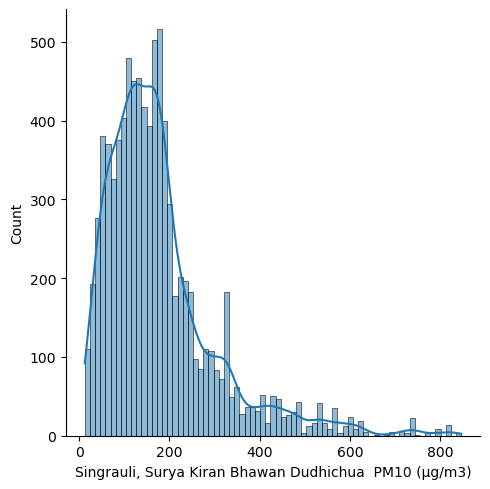

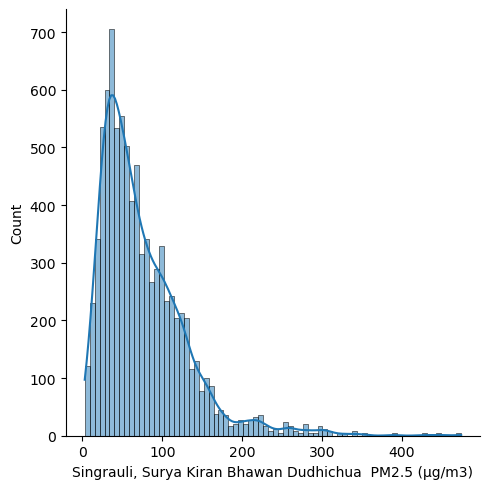

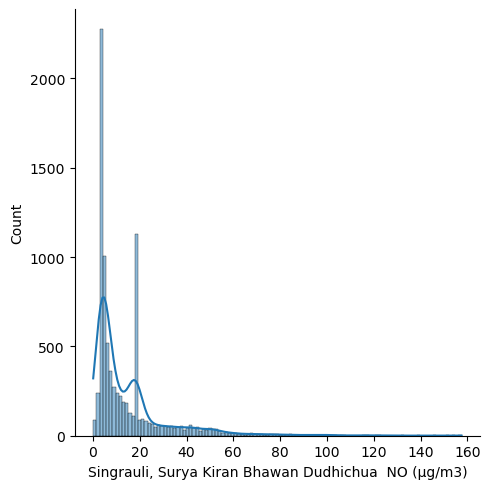

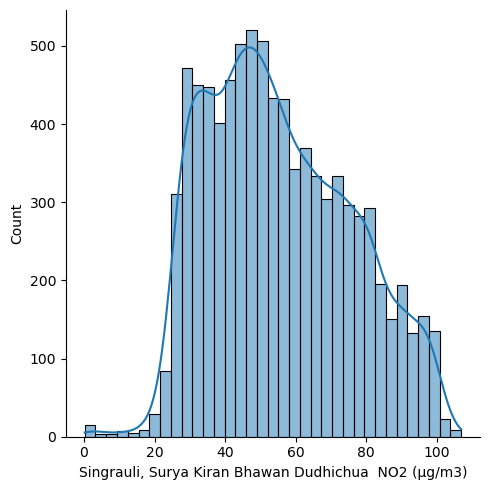

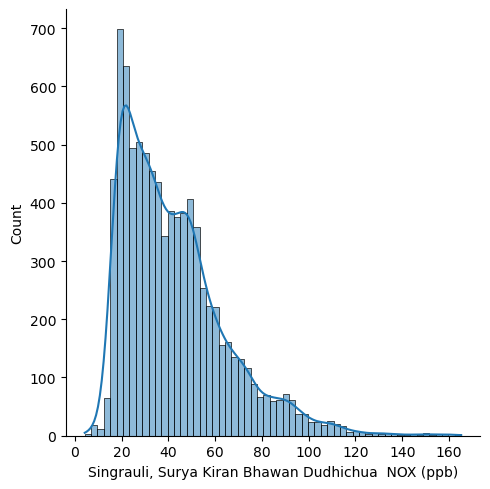

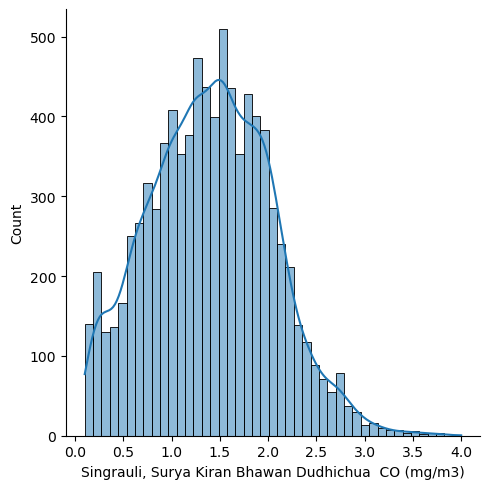

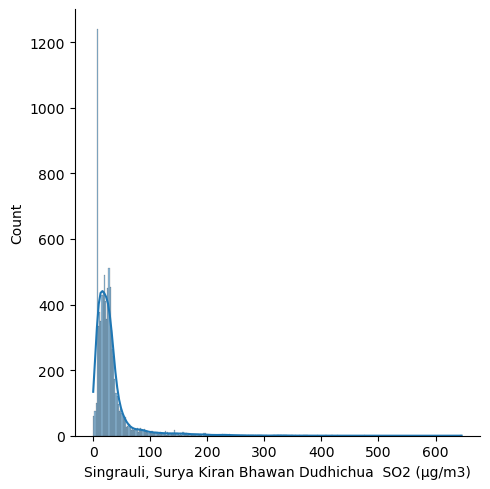

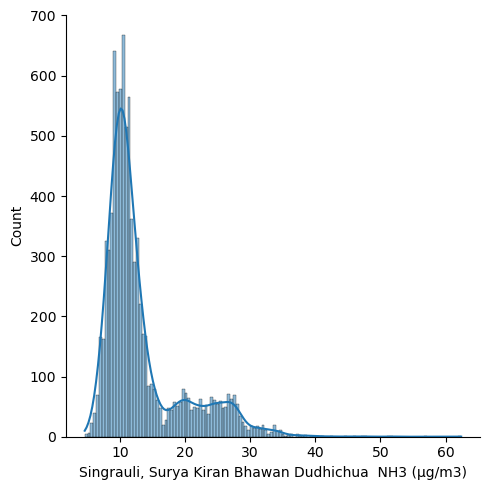

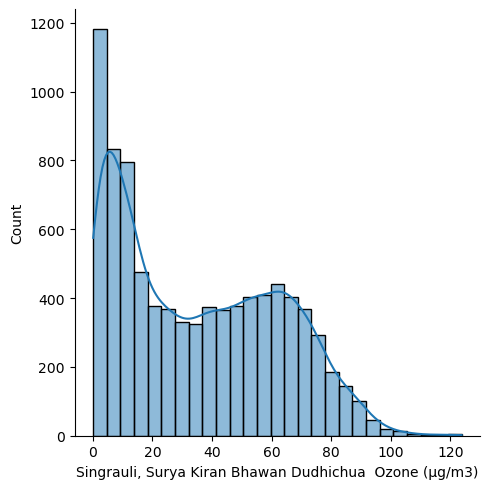

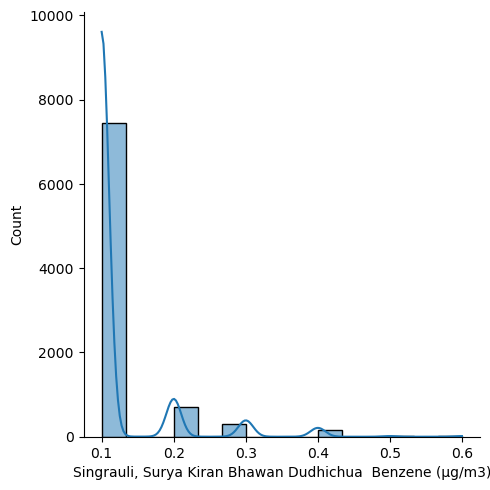

In [8]:
for column in columns:
    sns.displot(dataSet[column], kde = True)
    plt.show()

In [9]:
avg_level = dataSet.groupby(dataSet.index % 90).mean(numeric_only=True)

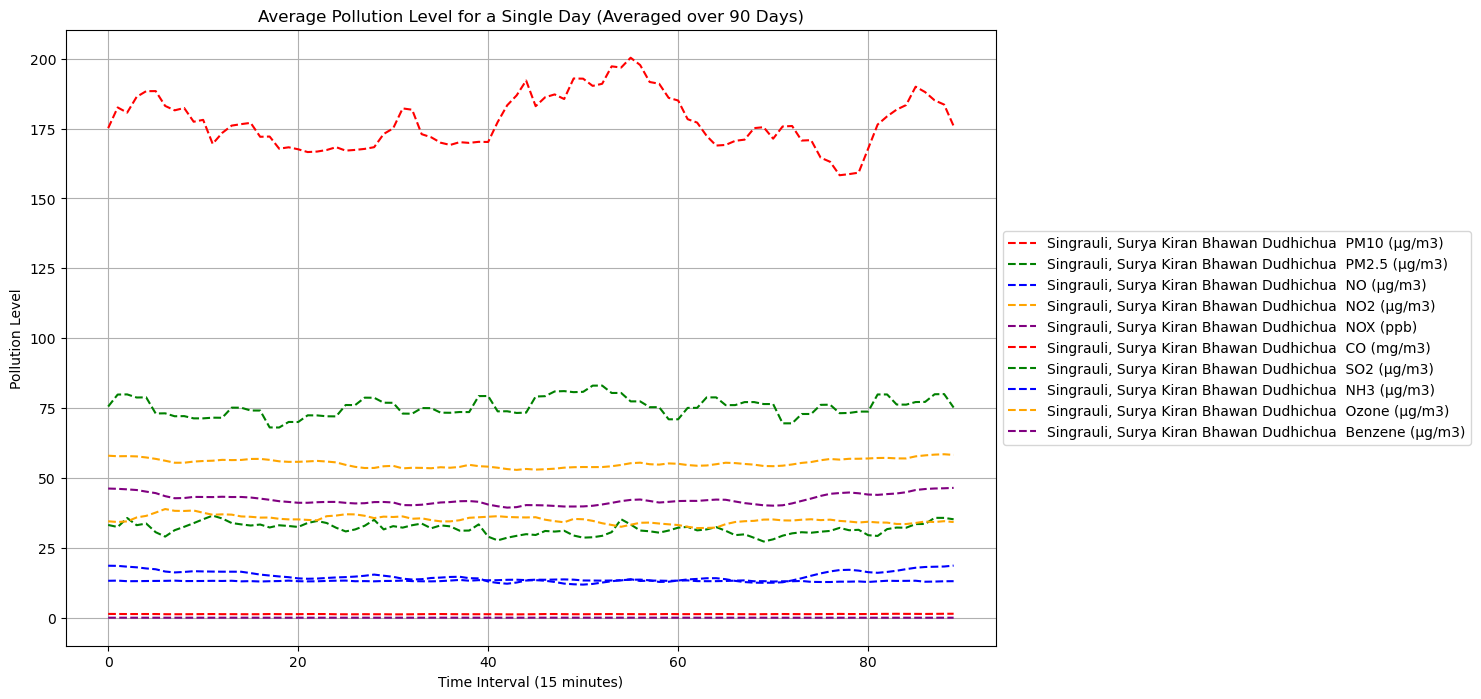

In [10]:
plt.figure(figsize=(12, 8))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, column in enumerate(columns):
    plt.plot(avg_level[column], label=column, color=colors[i % len(colors)], linestyle='--') 

plt.xlabel('Time Interval (15 minutes)')
plt.ylabel('Pollution Level')
plt.title('Average Pollution Level for a Single Day (Averaged over 90 Days)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True) 
plt.show()


### The plotted graph shows the average pollution levels for different gases during a single day, averaged over the 90-day period.

The pollutants' levels exhibit noticeable increases specifically during the time interval of 13:45 to 14:45(somewhere between 45th and 50th interval), suggesting a correlation with the blasting activities of coal in the region.

The graph provides a clear visual representation of the heightened pollution levels during the suspected blasting time. 
This observation supports the conclusion that the blasting time of coal in India is most likely occurring between 13:45 to 
14:45 pm. 

This inference is based on the analysis of average pollution levels and spikes during the specified time interval.

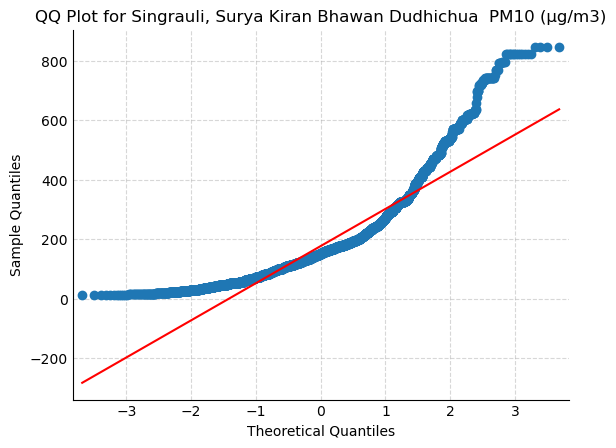

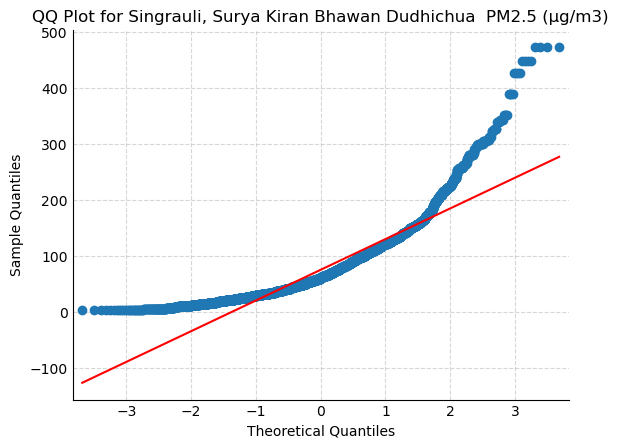

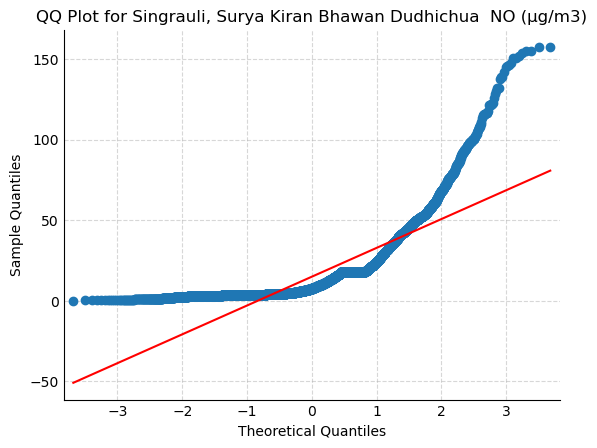

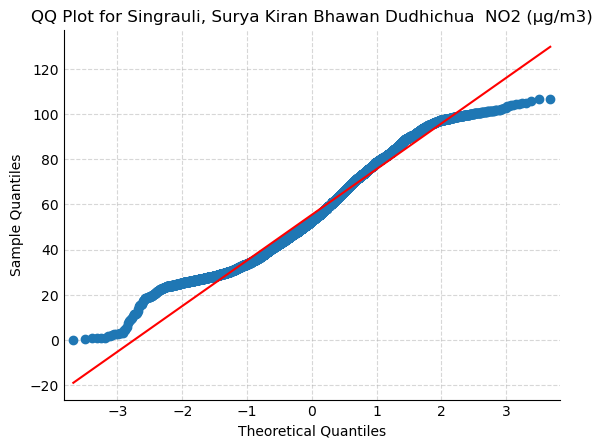

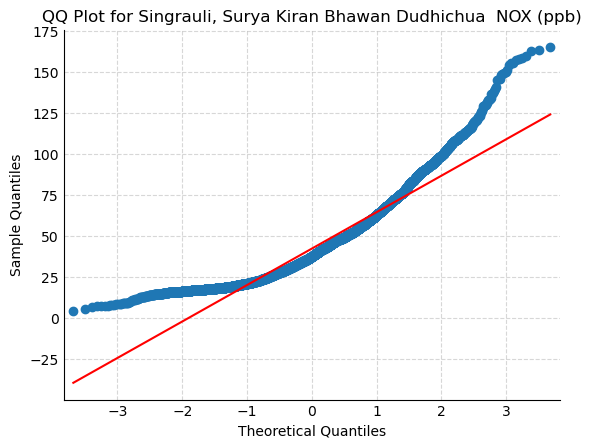

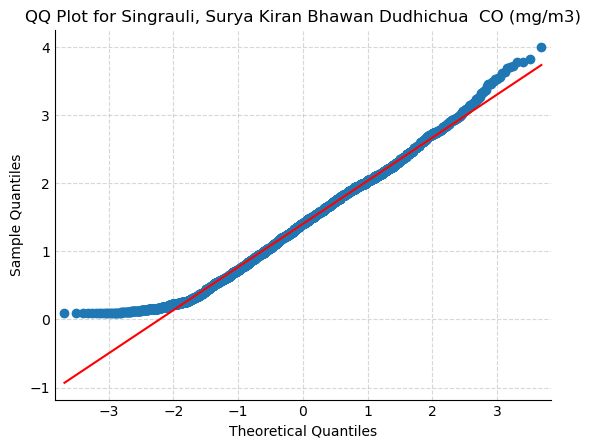

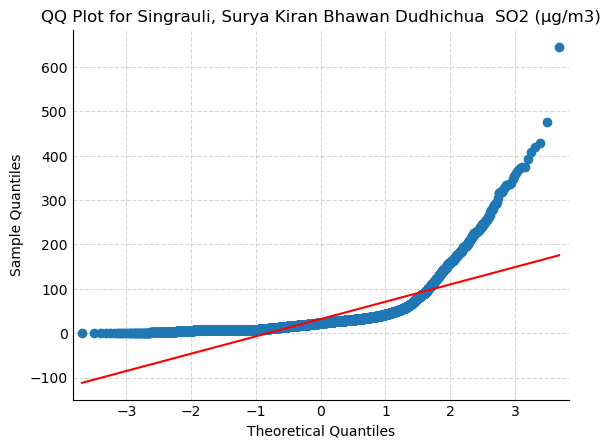

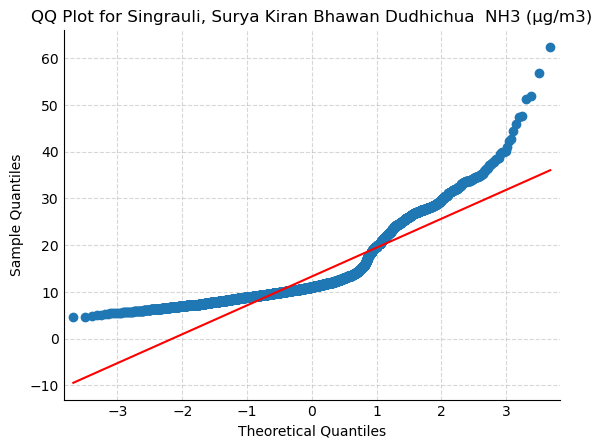

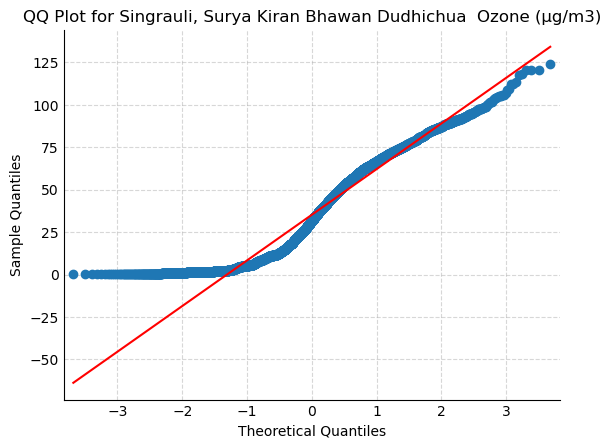

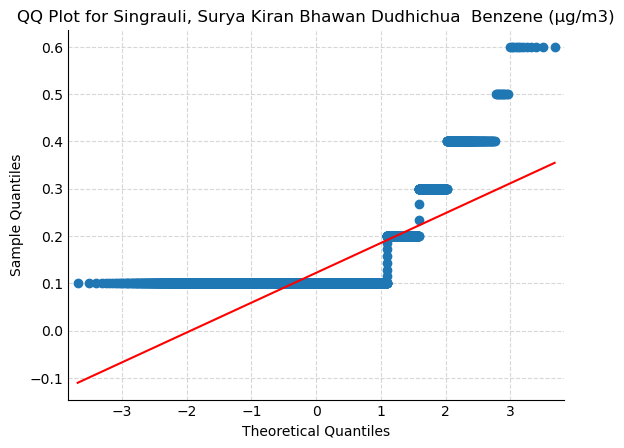

In [11]:
import statsmodels.api as sm
colors = ['red', 'green', 'blue', 'orange', 'purple']  # List of colors for each pollutant

for i, column in enumerate(columns):
    fig, ax = plt.subplots()
    sm.qqplot(dataSet[column], line='s', ax=ax)
    ax.set_title(f"QQ Plot for {column}")
    ax.spines['top'].set_visible(False)  # Remove top spine
    ax.spines['right'].set_visible(False)  # Remove right spine
    ax.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    ax.tick_params(axis='both', which='both', length=0)  # Remove tick marks
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.lines[0].set_color(colors[i % len(colors)])  # Set color for QQ plot line
    plt.show()

<Figure size 3000x5000 with 0 Axes>

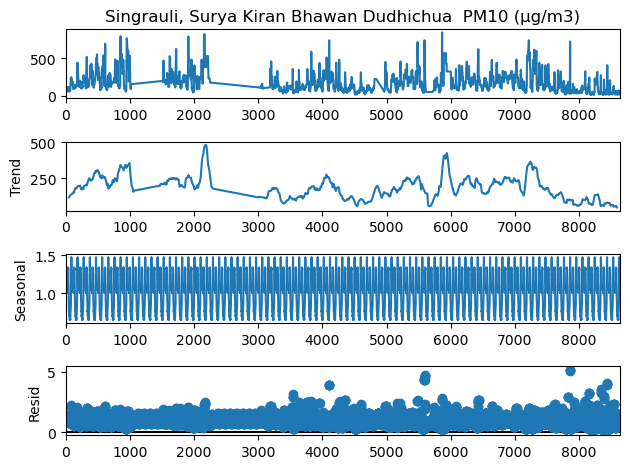

<Figure size 3000x5000 with 0 Axes>

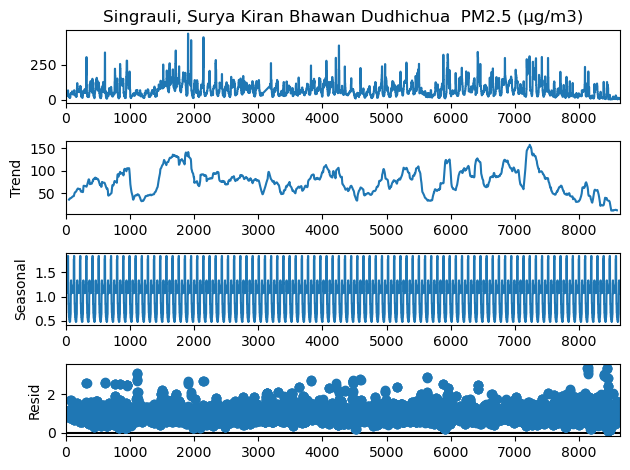

<Figure size 3000x5000 with 0 Axes>

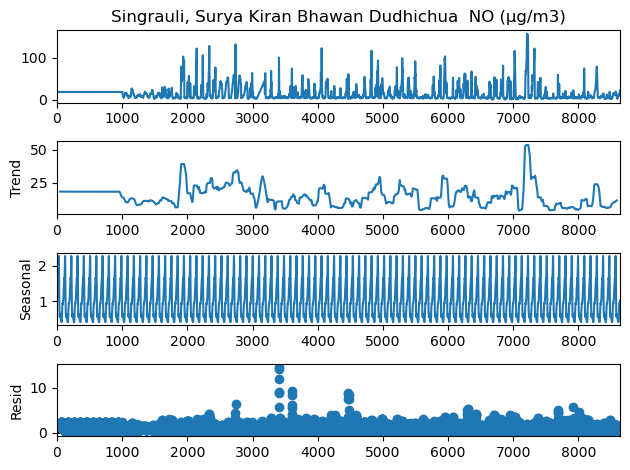

<Figure size 3000x5000 with 0 Axes>

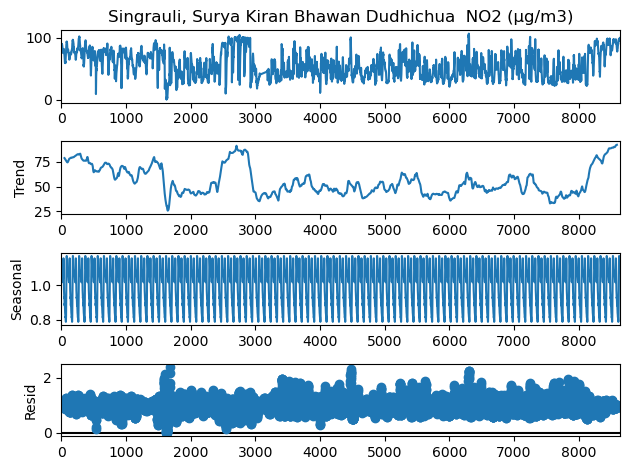

<Figure size 3000x5000 with 0 Axes>

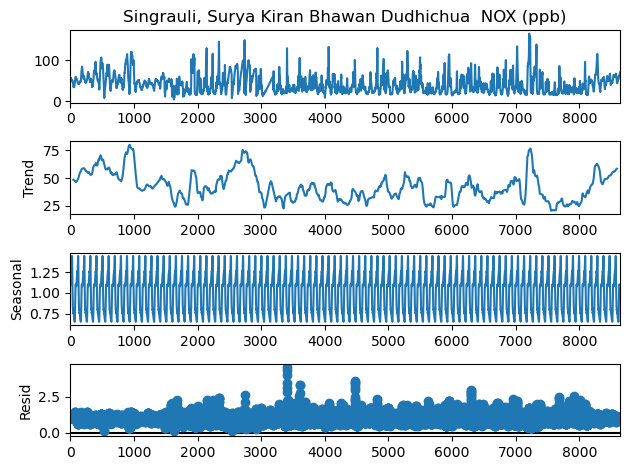

<Figure size 3000x5000 with 0 Axes>

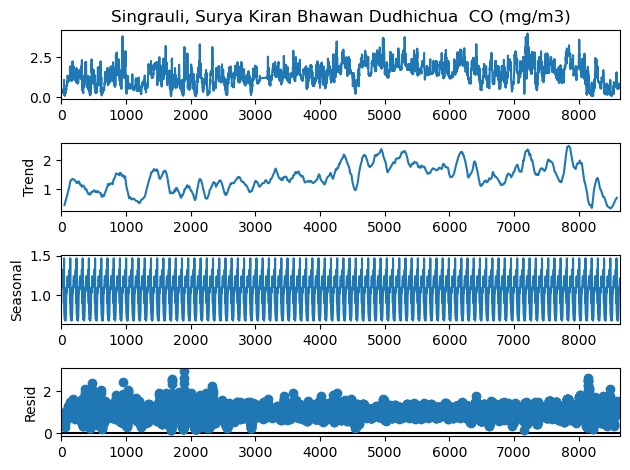

<Figure size 3000x5000 with 0 Axes>

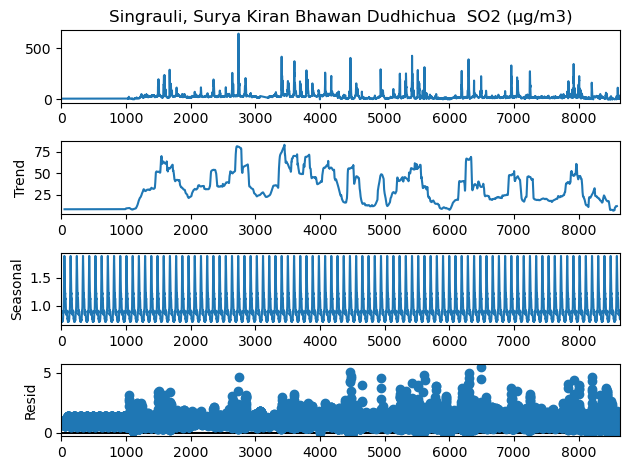

<Figure size 3000x5000 with 0 Axes>

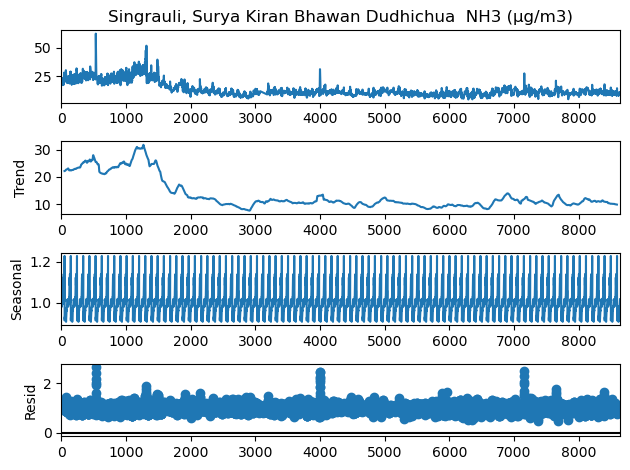

<Figure size 3000x5000 with 0 Axes>

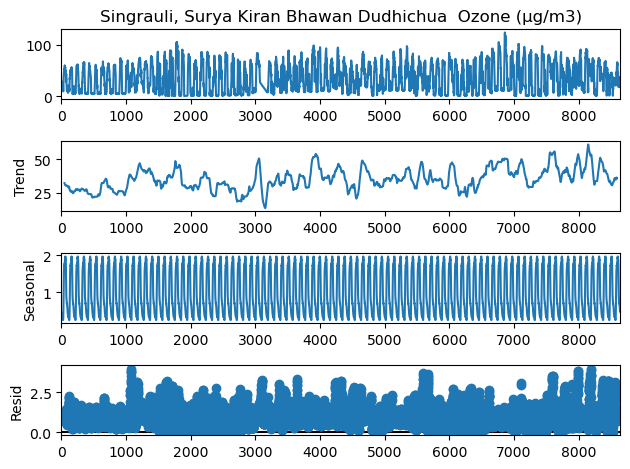

<Figure size 3000x5000 with 0 Axes>

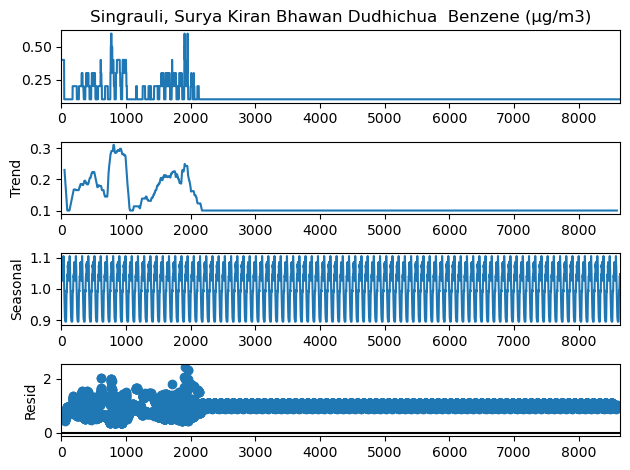

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
for column in columns:
    decompose_result_mult = seasonal_decompose(dataSet[column], period = 96, model="multiplicative")
    plt.figure(figsize=(30, 50))
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    decompose_result_mult.plot()

By looking at these graphs, we can conclude that since trend graph is not continuously increasing or decreasing, there is 
no trend in level of pollutant gases.

Since duration in which data is available is 3 months and seasonality graphs repeats in very small duration of time, we can conclude there is no seasonality in level of pollutant gases.

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for column in columns:
    result = adfuller(dataSet[column])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No. of Lags : %f' % result[2])
    print('No of Observation used for ADF regression and Critical Value Prediction : %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.023314
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8603.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -11.159054
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8603.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -14.799960
p-value: 0.000000
No. of Lags : 11.000000
No of Observation used for ADF regression and Critical Value Prediction : 8628.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -9.181725
p-value: 0.000000
No. of Lags : 21.000000
No of Observation used for ADF regression and Critical Value Prediction : 8618.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -12.734220
p-value: 0.000000
No. of Lags : 24.000000
No of Observation used for ADF regression and Critical Value Prediction : 8615.000000
Critical Values:

Since p value is significantly lower(<0.05) and ADF statistic is significantly negative(lower than critical values i.e 1%
5% and 10%), it rejects null hypothesis that there is no stationarity. Clearly, it indicates absence of trend and 
seasonality in pollutant levels.

We have concluded absence of trend and seasonality through ADF test results.

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


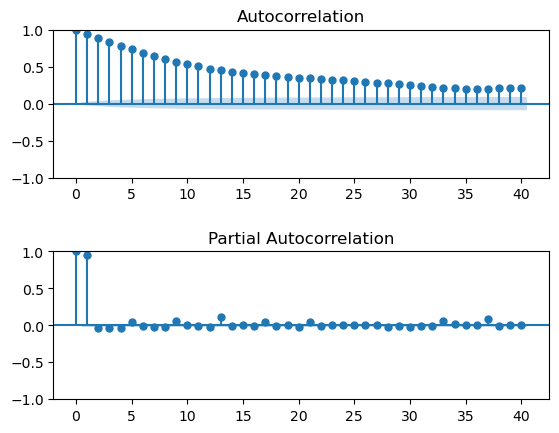

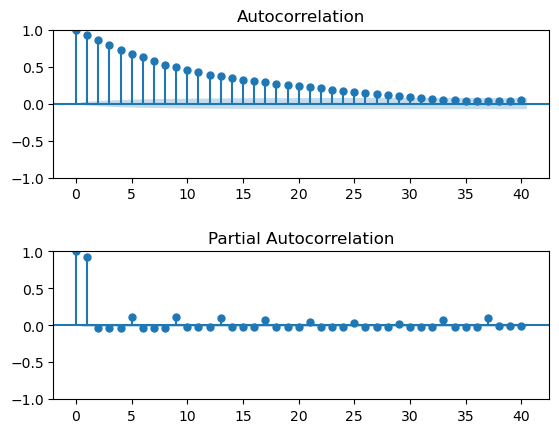

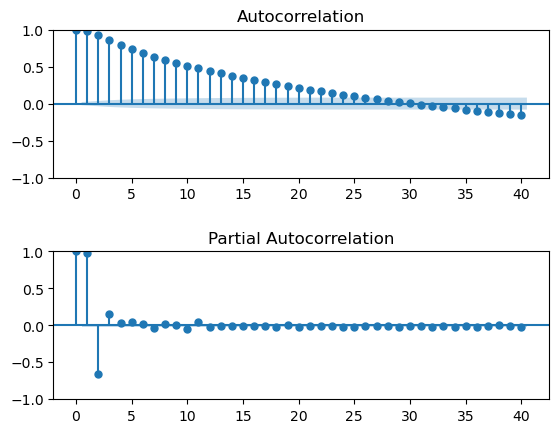

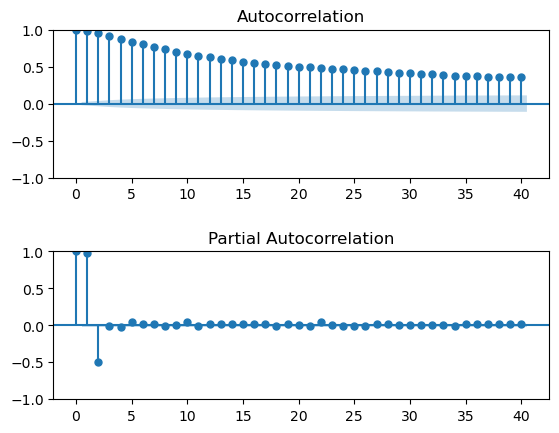

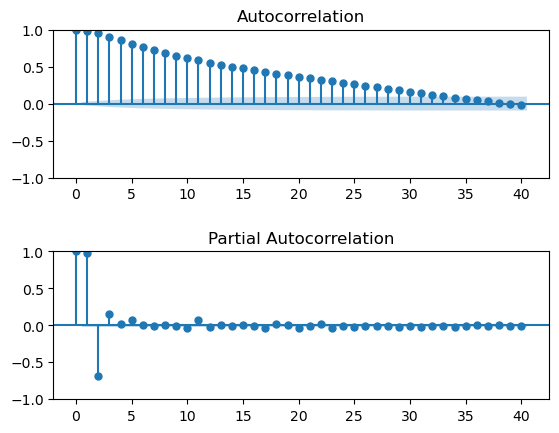

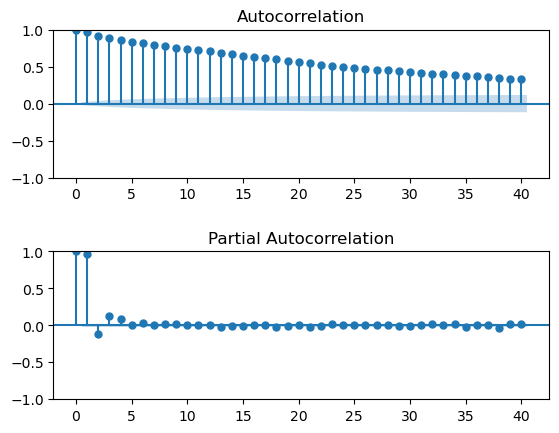

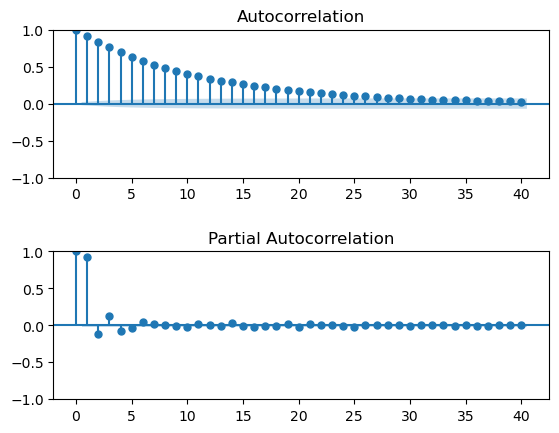

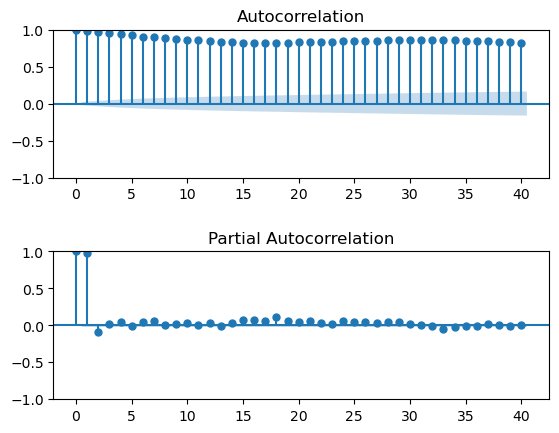

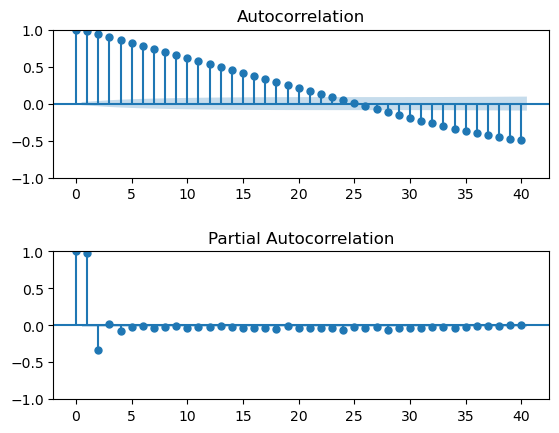

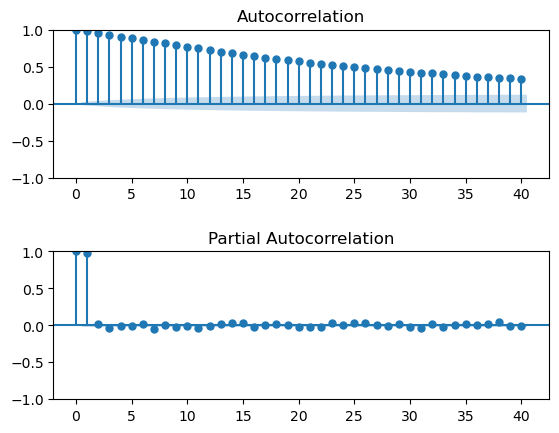

In [14]:
for column in columns:
    fig, (ax1, ax2) = plt.subplots(2)
    plot_acf(dataSet[column], ax = ax1)
    plot_pacf(dataSet[column], ax = ax2)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

Since autocorrelation graph never decays fully after a certain lag and also partial auto-correlation decays after certain
lag, we can infer that it resembles AutoRegressive Model (with value of p=2 or p=3).

PACF graph decays after a lag of 2 or 3 and ACF graphs never decays fully after a certain lag, we have used AR model further 
to describe the data.

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8640
Model:                                                        AutoReg(3)   Log Likelihood              -44157.239
Method:                                                  Conditional MLE   S.D. of innovations             40.190
Date:                                                   Tue, 27 Jun 2023   AIC                          88324.479
Time:                                                           18:10:56   BIC                          88359.798
Sample:                                                                3   HQIC                         88336.522
                                                                    8640                                         
                                                               coef    std err          

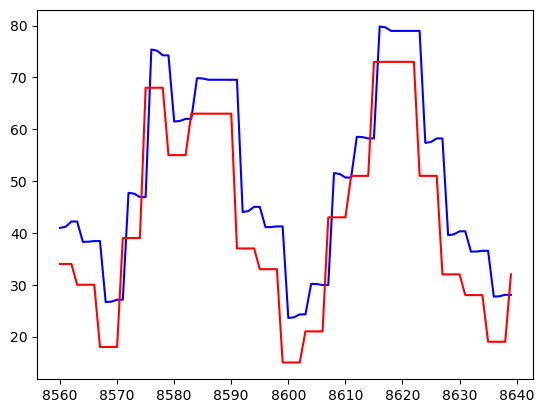

Mean : 177.463079
Root Mean Squared Error : 10.852239
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(3)   Log Likelihood              -38110.068
Method:                                                   Conditional MLE   S.D. of innovations             19.955
Date:                                                    Tue, 27 Jun 2023   AIC                          76230.136
Time:                                                            18:10:56   BIC                          76265.455
Sample:                                                                 3   HQIC                         76242.179
                                                                     8640                                         
                          

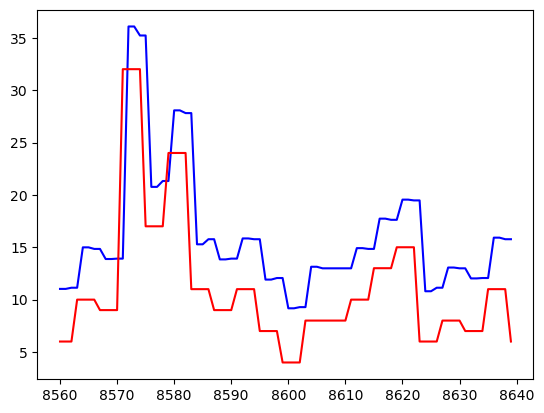

Mean : 75.557350
Root Mean Squared Error : 6.033443
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(3)   Log Likelihood              -21046.714
Method:                                                Conditional MLE   S.D. of innovations              2.767
Date:                                                 Tue, 27 Jun 2023   AIC                          42103.428
Time:                                                         18:10:56   BIC                          42138.747
Sample:                                                              3   HQIC                         42115.471
                                                                  8640                                         
                                                    

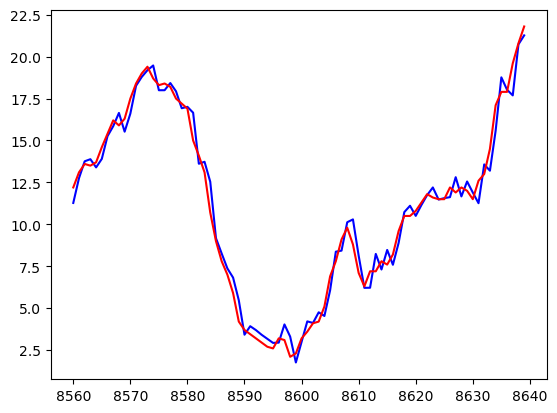

Mean : 14.940208
Root Mean Squared Error : 0.724277
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(3)   Log Likelihood              -21774.830
Method:                                                 Conditional MLE   S.D. of innovations              3.011
Date:                                                  Tue, 27 Jun 2023   AIC                          43559.661
Time:                                                          18:10:57   BIC                          43594.980
Sample:                                                               3   HQIC                         43571.704
                                                                   8640                                         
                                            

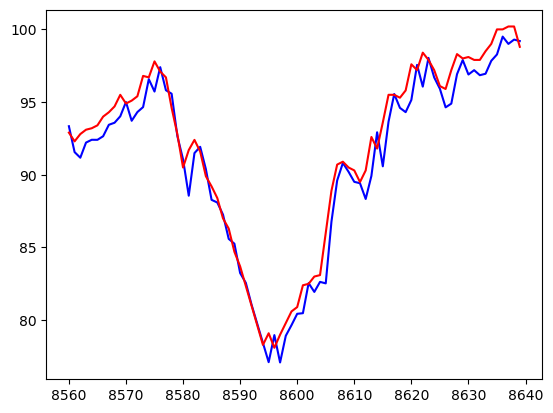

Mean : 55.430689
Root Mean Squared Error : 1.292297
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8640
Model:                                                     AutoReg(3)   Log Likelihood              -21068.541
Method:                                               Conditional MLE   S.D. of innovations              2.774
Date:                                                Tue, 27 Jun 2023   AIC                          42147.081
Time:                                                        18:10:57   BIC                          42182.400
Sample:                                                             3   HQIC                         42159.124
                                                                 8640                                         
                                                            

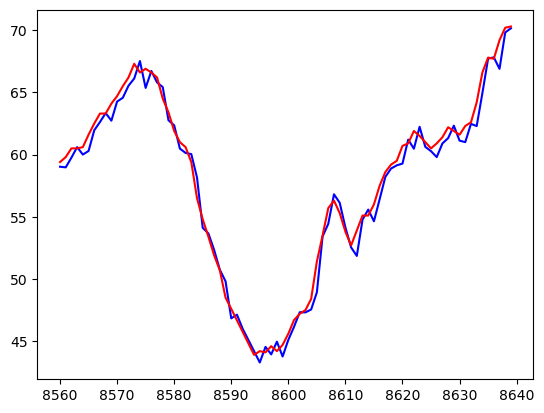

Mean : 42.328802
Root Mean Squared Error : 0.888006
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(3)   Log Likelihood                3269.221
Method:                                                Conditional MLE   S.D. of innovations              0.166
Date:                                                 Tue, 27 Jun 2023   AIC                          -6528.441
Time:                                                         18:10:57   BIC                          -6493.122
Sample:                                                              3   HQIC                         -6516.398
                                                                  8640                                         
                                                    

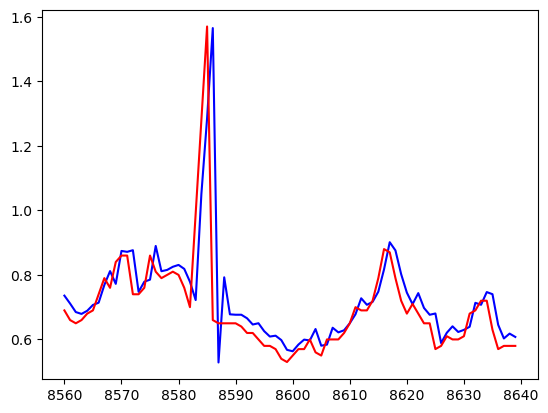

Mean : 1.401927
Root Mean Squared Error : 0.123370
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(3)   Log Likelihood              -35623.041
Method:                                                 Conditional MLE   S.D. of innovations             14.962
Date:                                                  Tue, 27 Jun 2023   AIC                          71256.081
Time:                                                          18:10:58   BIC                          71291.400
Sample:                                                               3   HQIC                         71268.124
                                                                   8640                                         
                                             

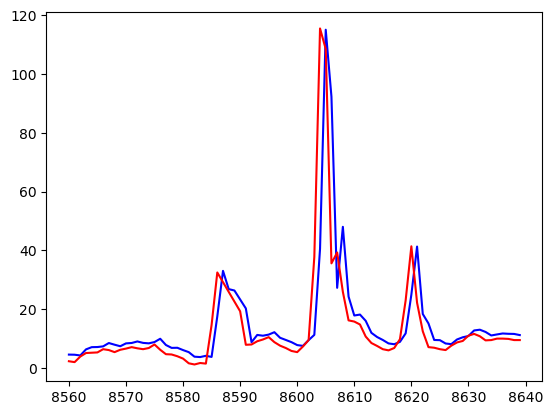

Mean : 31.923270
Root Mean Squared Error : 12.248406
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(3)   Log Likelihood              -12623.571
Method:                                                 Conditional MLE   S.D. of innovations              1.044
Date:                                                  Tue, 27 Jun 2023   AIC                          25257.142
Time:                                                          18:10:58   BIC                          25292.461
Sample:                                                               3   HQIC                         25269.185
                                                                   8640                                         
                                           

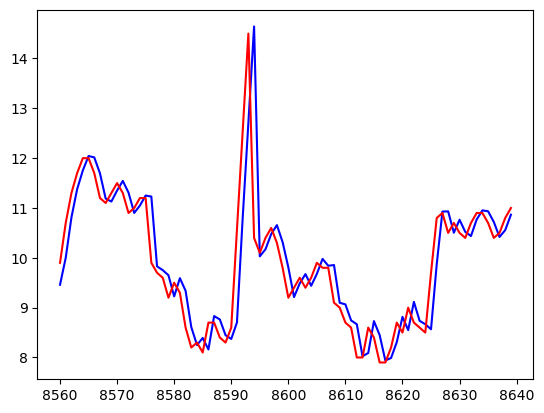

Mean : 13.286956
Root Mean Squared Error : 0.701728
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(3)   Log Likelihood              -26579.724
Method:                                                   Conditional MLE   S.D. of innovations              5.251
Date:                                                    Tue, 27 Jun 2023   AIC                          53169.447
Time:                                                            18:10:58   BIC                          53204.766
Sample:                                                                 3   HQIC                         53181.490
                                                                     8640                                         
                            

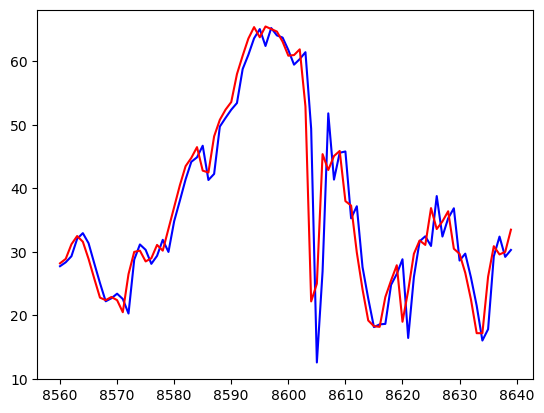

Mean : 35.193970
Root Mean Squared Error : 5.236985
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8640
Model:                                                           AutoReg(3)   Log Likelihood               25044.425
Method:                                                     Conditional MLE   S.D. of innovations              0.013
Date:                                                      Tue, 27 Jun 2023   AIC                         -50078.850
Time:                                                              18:10:58   BIC                         -50043.531
Sample:                                                                   3   HQIC                        -50066.807
                                                                       8640                                         
            

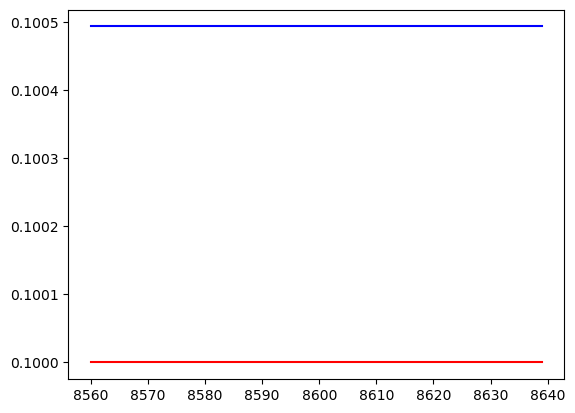

Mean : 0.122002
Root Mean Squared Error : 0.000493


In [15]:
from statsmodels.tsa.ar_model import AutoReg
for column in columns:
    data = dataSet[column]
    train_data = data[:-80]
    test_data = data[-80:]
    ar_model = AutoReg(data, lags = 3).fit()
    print(ar_model.summary())
    pred = ar_model.predict(start = len(train_data), end = len(data) - 1, dynamic=False)
    plt.plot(pred, color = "blue")
    plt.plot(test_data, color = "red")
    plt.show()
    rmse = sqrt(mean_squared_error(pred, test_data))
    mean = data.mean()
    print("Mean : %f" % mean)
    print("Root Mean Squared Error : %f" %rmse)